Base de dados MNIST

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization

In [29]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import keras
print("Keras version:", keras.__version__)

TensorFlow version: 2.17.0
Keras version: 3.4.1


In [5]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


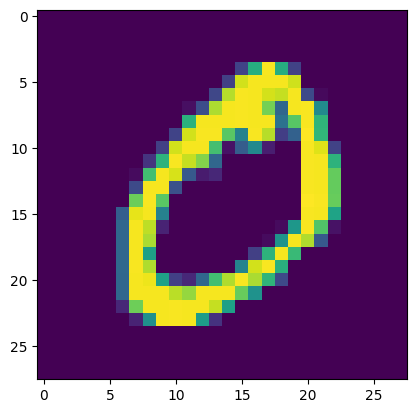

In [7]:
# visualizer
plt.imshow(X_train[1])

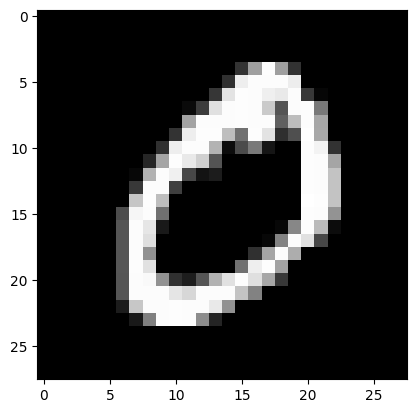

In [8]:
# Show numbers in the training dataframe in grayscale to reduce the channels from RGB to gray
plt.imshow(X_train[1], cmap ='gray')

Text(0.5, 1.0, 'Class[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0\n    0   0   0   0   0   0   0   0   0   0]\n [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0\n    0   0   0   0   0   0   0   0   0   0]\n [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0\n    0   0   0   0   0   0   0   0   0   0]\n [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0\n    0   0   0   0   0   0   0   0   0   0]\n [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253\n  159  50   0   0   0   0   0   0   0   0]\n [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252\n  252 237   0   0   0   0   0   0   0   0]\n [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239\n  233 252  57   6   0   0   0   0   0   0]\n [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202\n   84 252 253 122   0   0   0   0   0   0]\n [  0   0   0   0   0   0  

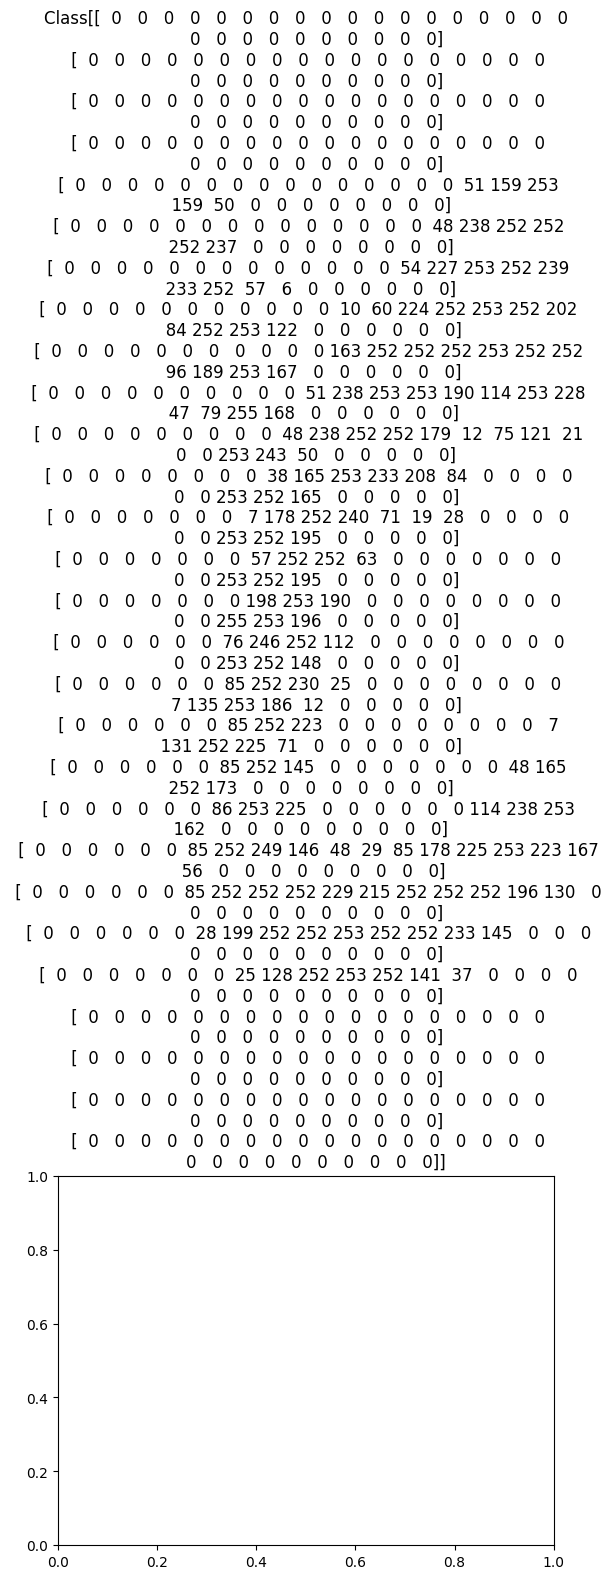

In [14]:
plt.title('Class'+ str(X_train[1]))

In [20]:
# change to 28x28, on channel
train = X_train.reshape(X_train.shape[0],28,28,1)
test = X_test.reshape(X_test.shape[0],28,28,1)
train = train.astype('float32')
test = test.astype('float32')
# normalization
train /= 255
test /= 255

In [36]:
from tensorflow.keras.utils import to_categorical

# resctrict number for probability in output for 10 class
class_train = to_categorical(y_train, 10)
class_test = to_categorical(y_test, 10)

In [45]:
# convolution operator
# first inicialization model
classificator = Sequential()
# - add layer conv2D with 32 kernel with size 3x3 size from feature detector (matriz)
# - strides mean how to move the pixels
# - padding refers to the addition of extra pixels around the border of an input image. This is done
# to control the spatial dimensions of the output feature maps (results from apply kernel, filter)
classificator.add(Conv2D(32, kernel_size=(3,3),
                         strides=(1,1),
                         padding='valid',
                         activation='relu',
                         input_shape=(28,28,1)))
classificator.add(BatchNormalization())
classificator.add(MaxPooling2D(pool_size=(2,2)))

classificator.add(Conv2D(32, (3,3), activation='relu'))
classificator.add(BatchNormalization())
classificator.add(MaxPooling2D(pool_size=(2,2)))
classificator.add(Flatten())

# This point finished the convolutional, 128 neurons
classificator.add(Dense(128, activation='relu'))
# dropout for avoid overfitting and less sparse, 20% input will become 0
classificator.add(Dropout(0.2))
classificator.add(Dense(128, activation='relu'))
classificator.add(Dropout(0.2))
classificator.add(Dense(10, activation='softmax'))

classificator.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])
classificator.fit(train, class_train,
                  batch_size=128,
                  epochs=10,
                  verbose=1,
                  validation_data=(test, class_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 73s 149ms/step - accuracy: 0.8618 - loss: 0.4418 - val_accuracy: 0.9545 - val_loss: 0.1560
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 69s 148ms/step - accuracy: 0.9797 - loss: 0.0674 - val_accuracy: 0.9873 - val_loss: 0.0413
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 100s 186ms/step - accuracy: 0.9853 - loss: 0.0472 - val_accuracy: 0.9884 - val_loss: 0.0397
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 126s 152ms/step - accuracy: 0.9861 - loss: 0.0425 - val_accuracy: 0.9899 - val_loss: 0.0324
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 152ms/step - accuracy: 0.9919 - loss: 0.0276 - val_accuracy: 0.9883 - val_loss: 0.0385
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 69s 147ms/step - accuracy: 0.9921 - loss: 0.0263 - val_accuracy: 0.9906 - val_loss: 0.0292
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 74s 157ms/step - accuracy: 0.9933 - loss: 0.0211 - val_accuracy: 0.9925 - val_loss: 0.0277
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 151ms/step - accuracy: 0.9936 - loss:

# Good
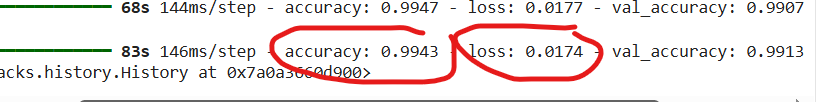